In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets as load_iris
from sklearn.model_selection import train_test_split
import seaborn as snb

## Numpy

In [2]:
m1 = np.array([
    [ 0,3,5 ] , [3,5,6]
    ])
print("x\n{}".format(m1))


x
[[0 3 5]
 [3 5 6]]


In [3]:
eye = np.eye(5)
print("Numpy array:\n{}".format(eye))

Numpy array:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [4]:
## convertir une serie numpy en sparse scipy sparse matrix en CSR format
sparse_m2 = sparse.csr_matrix(eye)
print("\nScipy sparrce CRS matrix:\n{}".format(sparse_m2))


Scipy sparrce CRS matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0


In [5]:
## other ways to create sparse representation
data = np.ones(5)
data = np.arange(5)
row_id = np.arange(5)
col_id = np.arange(5)
eye_coo = sparse.coo_matrix((data , (row_id , col_id ) ))

print("COO representation:\n{}".format(eye_coo))

COO representation:
  (0, 0)	0
  (1, 1)	1
  (2, 2)	2
  (3, 3)	3
  (4, 4)	4


In [6]:
## other ways
data = np.array([  
    [1,2,3,4,5],
    [0,0,0,1,0],
    [0,0,0,0,0],
    [0,0,0,1,0],
    [0,0,0,0,0]

] )
eye_coo = sparse.coo_matrix((data ))
print("COO representation:\n{}".format(eye_coo))

COO representation:
  (0, 0)	1
  (0, 1)	2
  (0, 2)	3
  (0, 3)	4
  (0, 4)	5
  (1, 3)	1
  (3, 3)	1


## MATPLOTLIB

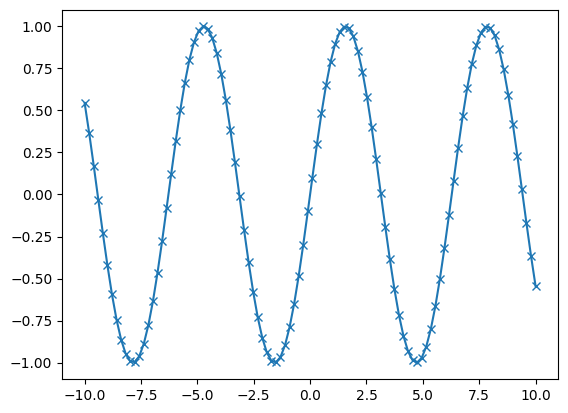

In [7]:
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y,marker='x') ;

## PANDAs

In [8]:
nom = 5*["WANTCHEKON"] + ["SINTONDJI"]
data = { 
    "nom" : nom ,
    "prenom" : ["Lucien" , "Stephene" , "Elma", "Stella" , "Uma" , "Hermine"],
    "Age" : [50,19,15,12,10,45]
}
data_ =  pd.DataFrame(data)
display(data_)

,nom,prenom,Age
0,WANTCHEKON,Lucien,50
1,WANTCHEKON,Stephene,19
2,WANTCHEKON,Elma,15
3,WANTCHEKON,Stella,12
4,WANTCHEKON,Uma,10
5,SINTONDJI,Hermine,45


## Scikit-learn|||

In [9]:
IRIS = pd.read_csv("data/iris.csv",sep=";",index_col=None)
IRIS["Petal.Length"] = IRIS["Petal.Length"].apply(lambda x : float(str(x).replace(",",".")))
IRIS["Petal.Width"] = IRIS["Petal.Width"].apply(lambda x : float(str(x).replace(",",".")))
IRIS["Sepal.Length"] = IRIS["Sepal.Length"].apply(lambda x : float(str(x).replace(",",".")))
IRIS["Sepal.Width"] = IRIS["Sepal.Width"].apply(lambda x : float(str(x).replace(",",".")))

def apply_ (x) : 
    if x =='setosa' : return 0 
    elif x == 'versicolor' : return 1  
    elif x == 'virginica' : return 2

iris_data = np.array(IRIS[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']])
iris_target = np.array(IRIS['Species'].apply(lambda x : apply_(x) ))
iris = { "data":iris_data , "target" : iris_target, "names":['setosa','versicolor','virginica'] }

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],random_state=0)

In [11]:
print("X_train shape {}".format(X_train.shape))
print("x_test shape {}\n".format(X_test.shape))
print("y_train shape {}".format(y_train.shape))
print("y_test shape {}".format(y_test.shape))

X_train shape (112, 4)
x_test shape (38, 4)

y_train shape (112,)
y_test shape (38,)


In [12]:
colomms = ['Petal.Length','Petal.Width','Sepal.Length','Sepal.Width']
iris_dataFrame = pd.DataFrame(X_train, columns=colomms)


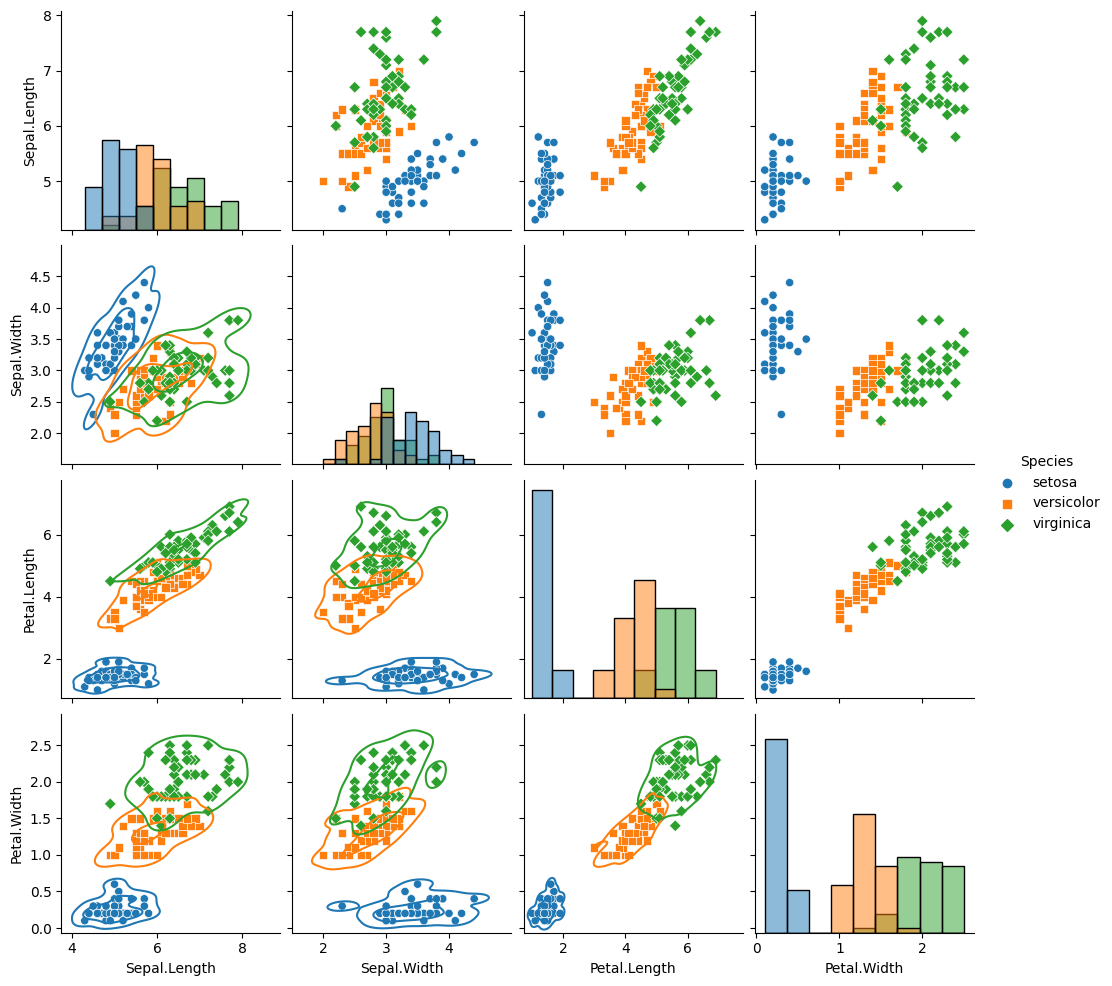

In [13]:
S = snb.pairplot(IRIS , hue="Species", diag_kind='hist',    #
              markers=['o' , 's' , 'D'],height=2.5 , corner=False)
S.map_lower(snb.kdeplot , levels = 3 , color = ".4")

# K-Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
## making Predictions
X_new = np.array([[5,2.9,1,0.2]])
print("X_new.shape: {}".format(X_new.shape))

# prediction
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted taget names : {}".format(iris['names'][prediction[0]]))


X_new.shape: (1, 4)
Prediction: [0]
Predicted taget names : setosa


## Evaluation du models

In [17]:
## premiere method
y_pred = knn.predict(X_test)
print("TEst set prediction: \n{}".format(y_pred))
print("\nScore de presision : {} %".format(round( np.mean(y_pred == y_test )*100 , 2) ) )

TEst set prediction: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]

Score de presision : 97.37 %


In [18]:
## deuxieme methodes
print("Test set score: {:.2f} %".format( knn.score(X_test, y_test)*100 ))

Test set score: 97.37 %


# Resume KNN

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score: {:.2f} %".format( knn.score(X_test, y_test)*100 ))


Test set score: 97.37 %
